In [6]:
%matplotlib inline
import seaborn
import pandas as pd
import numpy
import scipy.stats
import statsmodels.stats.multicomp as multi
import statsmodels.formula.api as smf

data = pd.read_csv("battles.csv")
gotD = pd.read_csv("Got_ Data.csv")
data1 = pd.read_csv("stormofswords.csv")


In [7]:
data1.head(n=10)

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
5,Aerys,Tywin,8
6,Alliser,Mance,5
7,Amory,Oberyn,5
8,Arya,Anguy,11
9,Arya,Beric,23


In [8]:
bytreatment = data1.groupby('Source')

In [9]:
bytreatment['Weight'].describe()

Source        
Aemon    count     2.000000
         mean     18.000000
         std      18.384776
         min       5.000000
         25%      11.500000
         50%      18.000000
         75%      24.500000
         max      31.000000
Aerys    count     4.000000
         mean      9.250000
         std       5.965177
         min       5.000000
         25%       5.750000
         50%       7.000000
         75%      10.500000
         max      18.000000
Alliser  count     1.000000
         mean      5.000000
         std            NaN
         min       5.000000
         25%       5.000000
         50%       5.000000
         75%       5.000000
         max       5.000000
Amory    count     1.000000
         mean      5.000000
         std            NaN
         min       5.000000
         25%       5.000000
         50%       5.000000
                    ...    
Viserys  std       2.121320
         min       4.000000
         25%       4.750000
         50%       5.500000
     

In [13]:
bytreatment['Target'].describe()

Source         
Aemon    count               2
         unique              2
         top           Samwell
         freq                1
Aerys    count               4
         unique              4
         top             Tywin
         freq                1
Alliser  count               1
         unique              1
         top             Mance
         freq                1
Amory    count               1
         unique              1
         top            Oberyn
         freq                1
Arya     count              16
         unique             16
         top           Joffrey
         freq                1
Balon    count               1
         unique              1
         top             Loras
         freq                1
Belwas   count               2
         unique              2
         top           Illyrio
         freq                1
Beric    count               3
         unique              3
                      ...     
Tyrion   top           

In [15]:
print ('ataques')
c1 = data["attacker_1"].value_counts(sort=False, dropna=False)
print(c1)

ataques
Bolton                         2
Lannister                      8
Frey                           2
Stark                          8
Bracken                        1
Brotherhood without Banners    1
Darry                          1
Free folk                      1
Brave Companions               1
Baratheon                      6
Greyjoy                        7
Name: attacker_1, dtype: int64


In [16]:
data['attacker_1'].fillna(11, inplace=True)
#recode 99 values as missing
data['attacker_1']=data['attacker_1'].replace(99, numpy.nan)

In [18]:
print ('Ataques por casa')
# check coding
chk2 = data['attacker_1'].value_counts(sort=False, dropna=False)
print(chk2)
ds2= data["attacker_1"].describe()
print(ds2)

Ataques por casa
Bolton                         2
Lannister                      8
Frey                           2
Stark                          8
Bracken                        1
Brotherhood without Banners    1
Darry                          1
Free folk                      1
Brave Companions               1
Baratheon                      6
Greyjoy                        7
Name: attacker_1, dtype: int64
count        38
unique       11
top       Stark
freq          8
Name: attacker_1, dtype: object


In [21]:
# distribucion de frecuencia por ataques
print ('ataques')
c3 = data['attacker_1'].value_counts(sort=False)
print(c3)

print ('porcentajes por ataque')
p3 = data['attacker_1'].value_counts(sort=False, normalize=True)
print (p3)

ataques
Bolton                         2
Lannister                      8
Frey                           2
Stark                          8
Bracken                        1
Brotherhood without Banners    1
Darry                          1
Free folk                      1
Brave Companions               1
Baratheon                      6
Greyjoy                        7
Name: attacker_1, dtype: int64
porcentajes por ataque
Bolton                         0.052632
Lannister                      0.210526
Frey                           0.052632
Stark                          0.210526
Bracken                        0.026316
Brotherhood without Banners    0.026316
Darry                          0.026316
Free folk                      0.026316
Brave Companions               0.026316
Baratheon                      0.157895
Greyjoy                        0.184211
Name: attacker_1, dtype: float64


In [6]:
c3 =data.groupby("attacker_1").size()
print (c3)

attacker_1
Baratheon                      6
Bolton                         2
Bracken                        1
Brave Companions               1
Brotherhood without Banners    1
Darry                          1
Free folk                      1
Frey                           2
Greyjoy                        7
Lannister                      8
Stark                          8
dtype: int64


In [7]:
median =data.groupby("attacker_1").median()
print (median)

                              year  battle_number  defender_3  defender_4  \
attacker_1                                                                  
Baratheon                    300.0           32.5         NaN         NaN   
Bolton                       299.5           21.5         NaN         NaN   
Bracken                      300.0           37.0         NaN         NaN   
Brave Companions             300.0           30.0         NaN         NaN   
Brotherhood without Banners  299.0           23.0         NaN         NaN   
Darry                        299.0           21.0         NaN         NaN   
Free folk                    300.0           28.0         NaN         NaN   
Frey                         299.0           26.5         NaN         NaN   
Greyjoy                      299.0           12.0         NaN         NaN   
Lannister                    298.5           12.0         NaN         NaN   
Stark                        299.0           13.0         NaN         NaN   

In [8]:
median1 =data.groupby("attacker_1").max()
print (median1)

                                                     name  year  \
attacker_1                                                        
Baratheon                             Siege of Winterfell   300   
Bolton                                 Sack of Winterfell   300   
Bracken                                Siege of Raventree   300   
Brave Companions                         Sack of Saltpans   300   
Brotherhood without Banners  Battle of the Burning Septry   299   
Darry                                      Siege of Darry   299   
Free folk                          Battle of Castle Black   300   
Frey                                      The Red Wedding   299   
Greyjoy                          Sack of Torrhen's Square   300   
Lannister                               Siege of Riverrun   300   
Stark                                   Sack of Harrenhal   299   

                             battle_number             attacker_king  \
attacker_1                                              

In [9]:
median2 =data.groupby("attacker_1").std()
print (median2)

                                 year  battle_number  defender_3  defender_4  \
attacker_1                                                                     
Baratheon                    0.516398       8.899438         NaN         NaN   
Bolton                       0.707107      10.606602         NaN         NaN   
Bracken                           NaN            NaN         NaN         NaN   
Brave Companions                  NaN            NaN         NaN         NaN   
Brotherhood without Banners       NaN            NaN         NaN         NaN   
Darry                             NaN            NaN         NaN         NaN   
Free folk                         NaN            NaN         NaN         NaN   
Frey                         0.000000       0.707107         NaN         NaN   
Greyjoy                      0.487950      10.919620         NaN         NaN   
Lannister                    0.744024      13.070550         NaN         NaN   
Stark                        0.517549   

In [10]:
median3 =data.groupby("attacker_1").mean()
print (median3)

                                   year  battle_number  defender_3  \
attacker_1                                                           
Baratheon                    299.666667      29.000000         NaN   
Bolton                       299.500000      21.500000         NaN   
Bracken                      300.000000      37.000000         NaN   
Brave Companions             300.000000      30.000000         NaN   
Brotherhood without Banners  299.000000      23.000000         NaN   
Darry                        299.000000      21.000000         NaN   
Free folk                    300.000000      28.000000         NaN   
Frey                         299.000000      26.500000         NaN   
Greyjoy                      299.285714      16.714286         NaN   
Lannister                    298.625000      14.375000         NaN   
Stark                        298.625000      12.500000         NaN   

                             defender_4  major_death  major_capture  \
attacker_1        

In [11]:
c4 = data["attacker_1"].value_counts(sort=False, normalize= True)
print(c4)

Brave Companions               0.026316
Darry                          0.026316
Greyjoy                        0.184211
Frey                           0.052632
Bracken                        0.026316
Bolton                         0.052632
Lannister                      0.210526
Free folk                      0.026316
Brotherhood without Banners    0.026316
Stark                          0.210526
Baratheon                      0.157895
Name: attacker_1, dtype: float64


In [12]:
battles_percent = data['attacker_1'].value_counts(sort = False, dropna = False, normalize = True)
print (battles_percent.sort_index())

Baratheon                      0.157895
Bolton                         0.052632
Bracken                        0.026316
Brave Companions               0.026316
Brotherhood without Banners    0.026316
Darry                          0.026316
Free folk                      0.026316
Frey                           0.052632
Greyjoy                        0.184211
Lannister                      0.210526
Stark                          0.210526
Name: attacker_1, dtype: float64


In [13]:
c1 = data["attacker_1"].value_counts(sort=False, dropna=False)
print(c1)
print (data.sort_index())

Brave Companions               1
Darry                          1
Greyjoy                        7
Frey                           2
Bracken                        1
Bolton                         2
Lannister                      8
Free folk                      1
Brotherhood without Banners    1
Stark                          8
Baratheon                      6
Name: attacker_1, dtype: int64
                                                 name  year  battle_number  \
0                          Battle of the Golden Tooth   298              1   
1                         Battle at the Mummer's Ford   298              2   
2                                  Battle of Riverrun   298              3   
3                            Battle of the Green Fork   298              4   
4                       Battle of the Whispering Wood   298              5   
5                                 Battle of the Camps   298              6   
6                                       Sack of Darry   298 

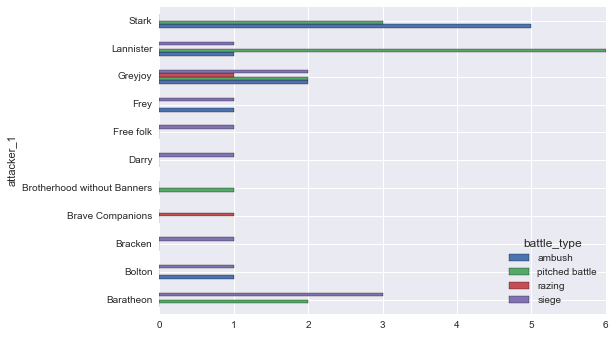

In [14]:
data.groupby(['attacker_1', 'battle_type']).count()['name'].unstack().plot(kind = 'barh')

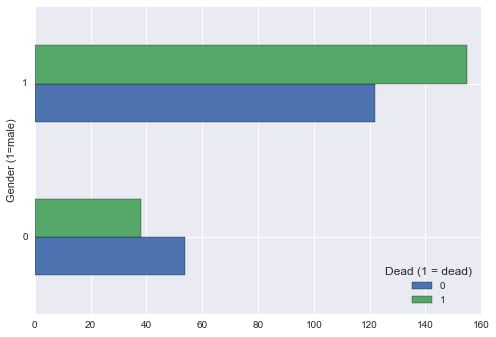

In [15]:
gotD.groupby(['Gender (1=male)', 'Dead (1 = dead)']).count()['Character'].unstack().plot(kind = 'barh')

NameError: name 'plt' is not defined

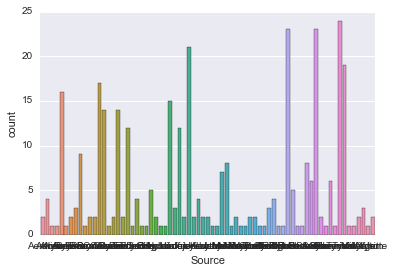

In [22]:

seaborn.countplot(x='Source', data=data1)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.xlabel('Intervalos')
plt.title('Distribucion de Relaciones con otros personajes')
plt.tight_layout()
plt.savefig("01latitudesbarplot.png")


In [5]:

c11= data1.groupby('Source').size()
print (c11)



Source
Aemon            2
Aerys            4
Alliser          1
Amory            1
Arya            16
Balon            1
Belwas           2
Beric            3
Bran             9
Brienne          1
Bronn            2
Brynden          2
Catelyn         17
Cersei          14
Craster          1
Daario           2
Daenerys        14
Davos            2
Eddard          12
Eddison          1
Edmure           4
Gendry           1
Gilly            1
Gregor           5
Hodor            2
Hoster           1
Irri             1
Jaime           15
Janos            3
Joffrey         12
                ..
Melisandre       2
Meryn            1
Missandei        1
Myrcella         2
Oberyn           2
Podrick          1
Rattleshirt      1
Renly            3
Rhaegar          4
Rickard          1
Rickon           1
Robb            23
Robert           5
Robert Arryn     1
Roose            1
Samwell          8
Sandor           6
Sansa           23
Shae             2
Shireen          1
Stannis          6
Tomme

In [21]:
sldata['Source'] = sldata['Source'].astype('category')
print ("Describe number of layers data")
laydesc = sldata['Source'].describe()
print(laydesc)

Describe number of layers data
count        352
unique        71
top       Tyrion
freq          24
Name: Source, dtype: object


In [63]:
def incomegrp (row):
   if row['Source'] <= "Arya":
      return 1
   elif row['Source'] <= "Jaime":
      return 2
   elif row['Source'] <= "Jon":
      return 3
   elif row['Source'] <= "Tyrion":
      return 4
   
   

   
   
   
data1['incomegrp'] = data1.apply (lambda row: incomegrp (row),axis=1)

chk1 = data1['incomegrp'].value_counts(sort=False, dropna=False)
print(chk1)

sub1=data[(data1['incomegrp']== 1)]
sub2=data[(data1['incomegrp']== 2)]
sub3=data[(data1['incomegrp']== 3)]
sub4=data[(data1['incomegrp']== 4)]
sub5=data[(data1['incomegrp']== 5)]


NaN      29
 1.0     24
 2.0    113
 3.0     38
 4.0    148
Name: incomegrp, dtype: int64


C:\Python34\lib\site-packages\ipykernel\__main__.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python34\lib\site-packages\ipykernel\__main__.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python34\lib\site-packages\ipykernel\__main__.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python34\lib\site-packages\ipykernel\__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python34\lib\site-packages\ipykernel\__main__.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [109]:
c3 = sldata['EJECTA'].value_counts(sort=False)
print(c3)


Jon      24
Jaime    16
Name: EJECTA, dtype: int64


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
import matplotlib.patches as mpatches
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from collections import Counter

In [30]:
battles = pd.read_csv("battles.csv")

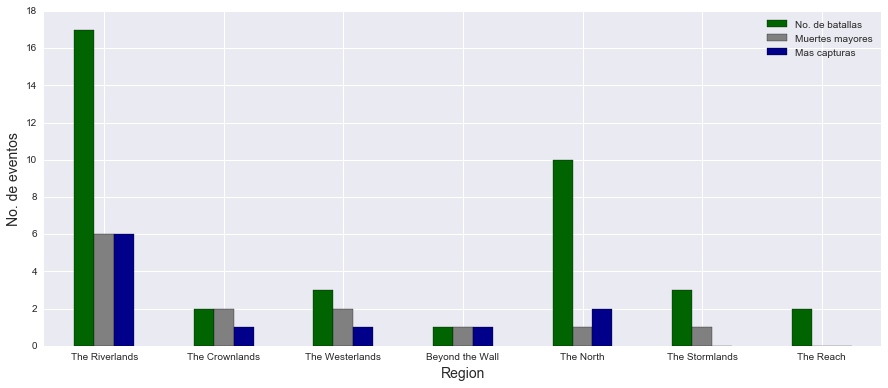

In [33]:
data = battles.groupby("region").sum()[["major_death", "major_capture"]].sort_values("major_death", ascending = False).copy(deep = True)
p = battles.region.value_counts().to_frame().merge(
    data[["major_death"]], left_index = True, right_index = True).merge(
    data[["major_capture"]], left_index = True, right_index = True).plot(
    kind = 'bar', figsize = (15, 6), color = ["darkgreen", "grey", "darkblue"], rot = 0)
_ = p.set_xlabel("Region", fontsize = 14.), p.set_ylabel("No. de eventos", fontsize = 14.), p.legend(["No. de batallas", "Muertes mayores", "Mas capturas"])

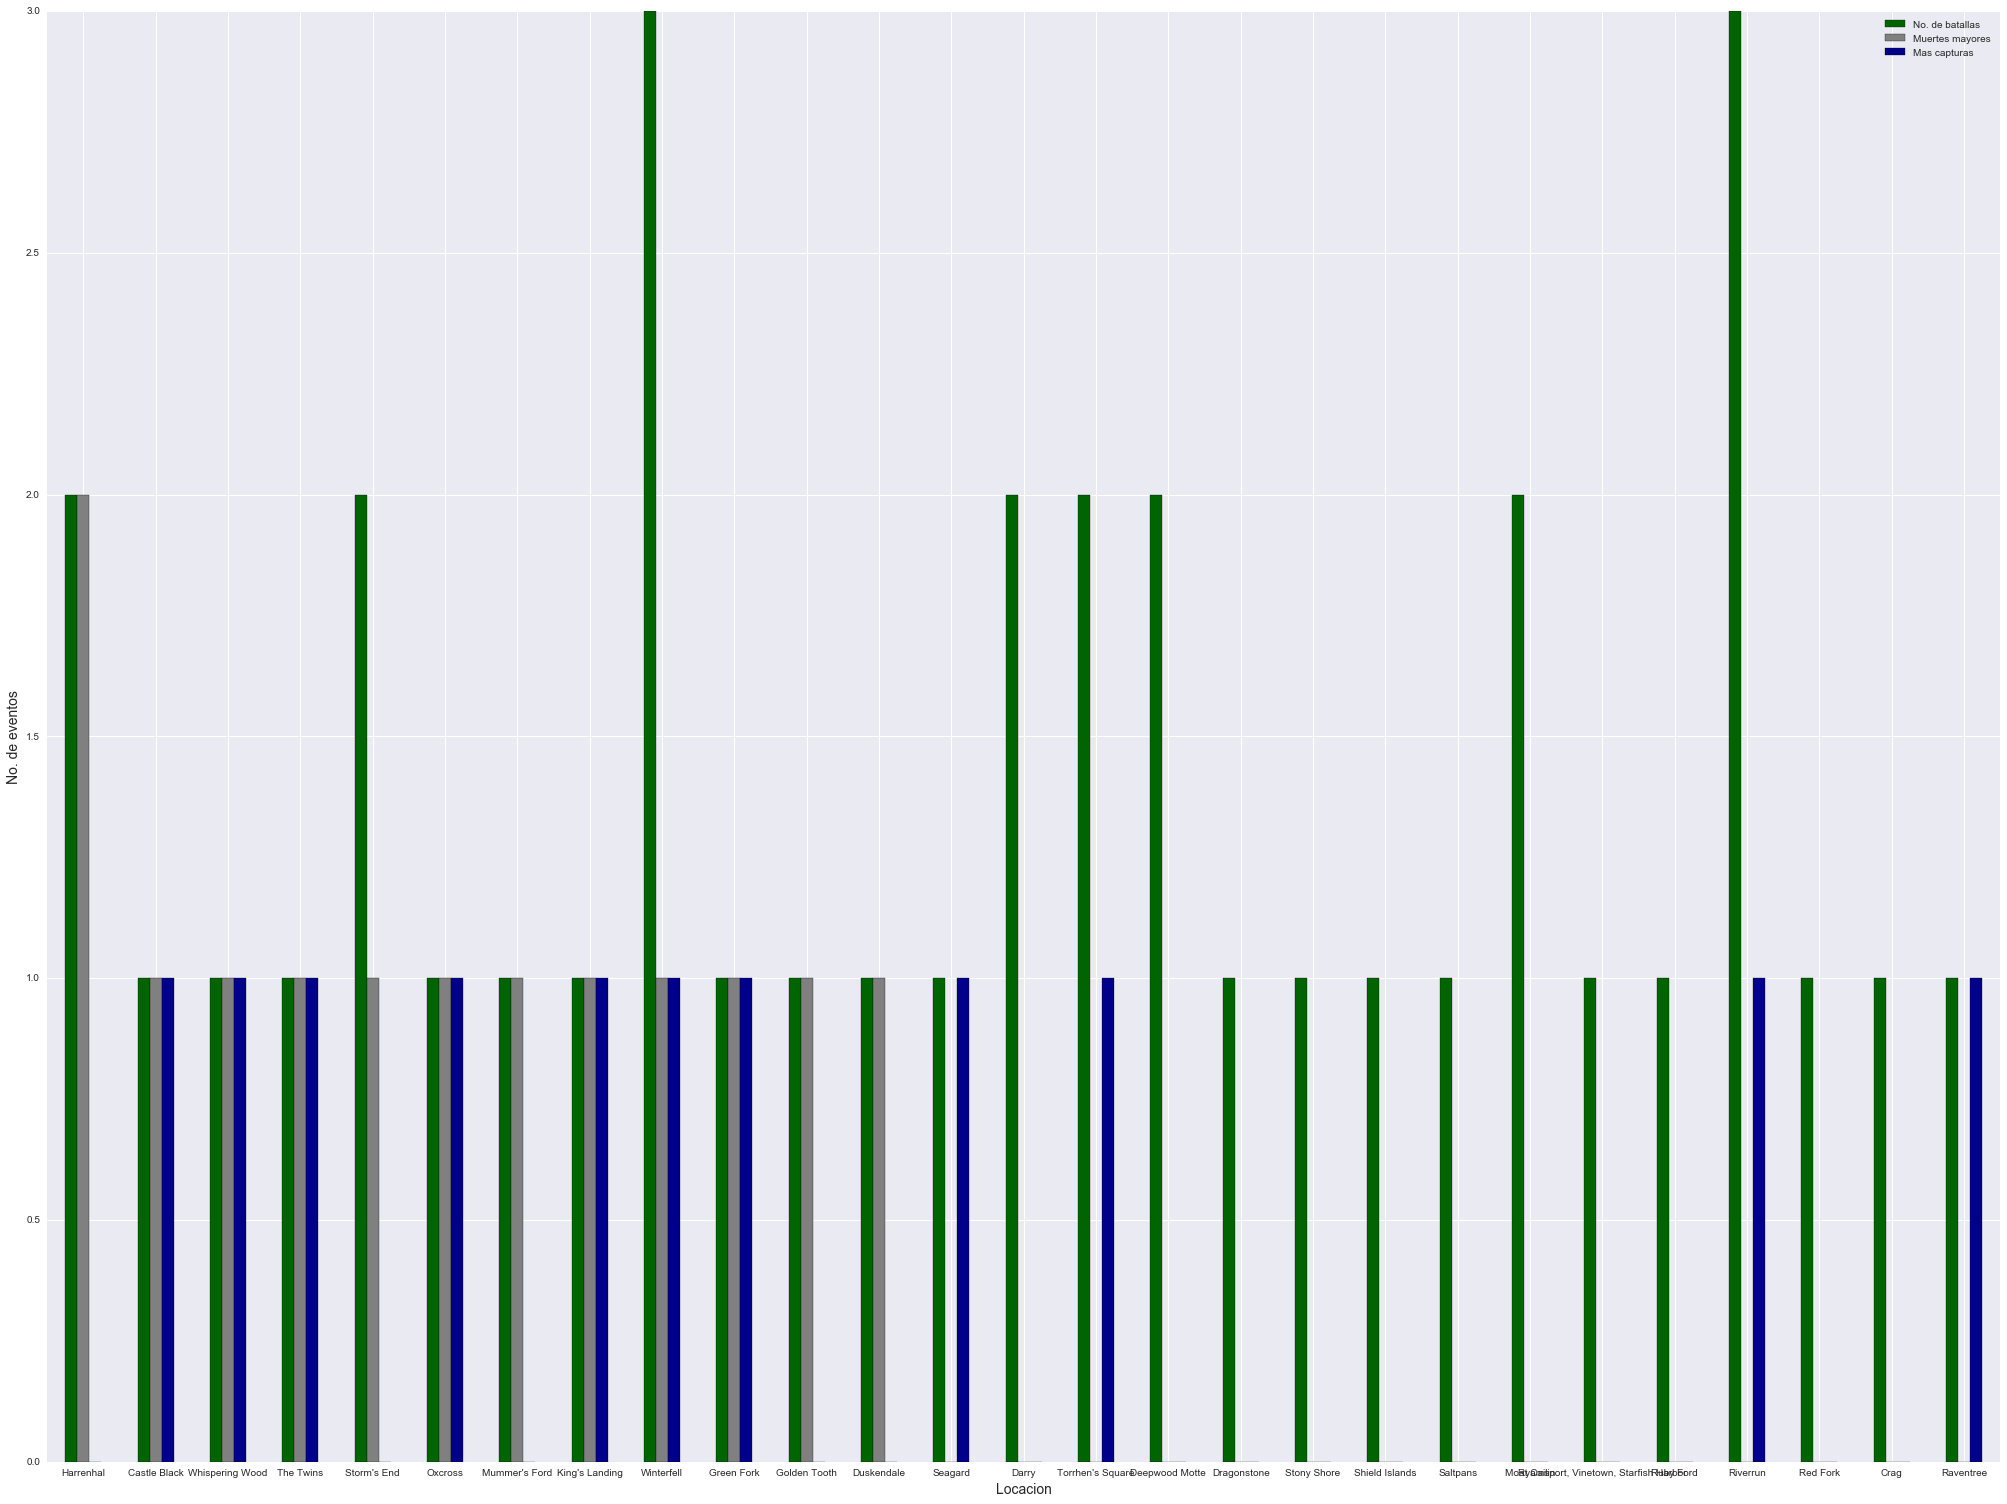

In [45]:
data = battles.groupby("location").sum()[["major_death", "major_capture"]].sort_values("major_death", ascending = False).copy(deep = True)
p = battles.location.value_counts().to_frame().merge(
    data[["major_death"]], left_index = True, right_index = True).merge(
    data[["major_capture"]], left_index = True, right_index = True).plot(
    kind = 'bar', figsize = (35, 26), color = ["darkgreen", "grey", "darkblue"], rot = 0)
_ = p.set_xlabel("Locacion", fontsize = 14.), p.set_ylabel("No. de eventos", fontsize = 14.), p.legend(["No. de batallas", "Muertes mayores", "Mas capturas"])

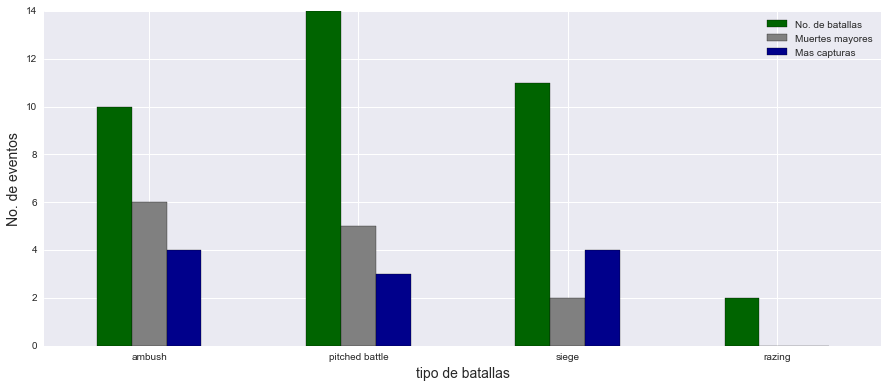

In [49]:
data = battles.groupby("battle_type").sum()[["major_death", "major_capture"]].sort_values("major_death", ascending = False).copy(deep = True)
p = battles.battle_type.value_counts().to_frame().merge(
    data[["major_death"]], left_index = True, right_index = True).merge(
    data[["major_capture"]], left_index = True, right_index = True).plot(
    kind = 'bar', figsize = (15, 6), color = ["darkgreen", "grey", "darkblue"], rot = 0)
_ = p.set_xlabel("tipo de batallas", fontsize = 14.), p.set_ylabel("No. de eventos", fontsize = 14.), p.legend(["No. de batallas", "Muertes mayores", "Mas capturas"])

In [51]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


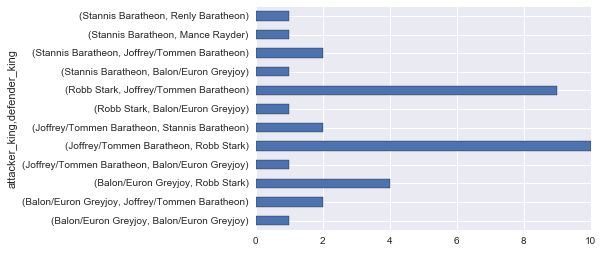

In [52]:
battles.groupby(['attacker_king', 'defender_king']).count()['name'].plot(kind = 'barh')